In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import warnings 
warnings.filterwarnings("ignore")

# Loading the dataset and also performing the EDA

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 200 rows and 5 columns in the dataset.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


There are no duplicate values in the data.

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing values in the data.

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As we can see that there are 4 numerical columns in the data we can also say that in some of the columns there might be some outliers present. We will look this into further while performing the data visualization.

In [10]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Before moving on further we will rename some columns so that we can move along easily with furthere visualization.

In [12]:
df.rename(columns = {"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Score"}, inplace = True)

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

The column name has been changed successfuly 

In [14]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

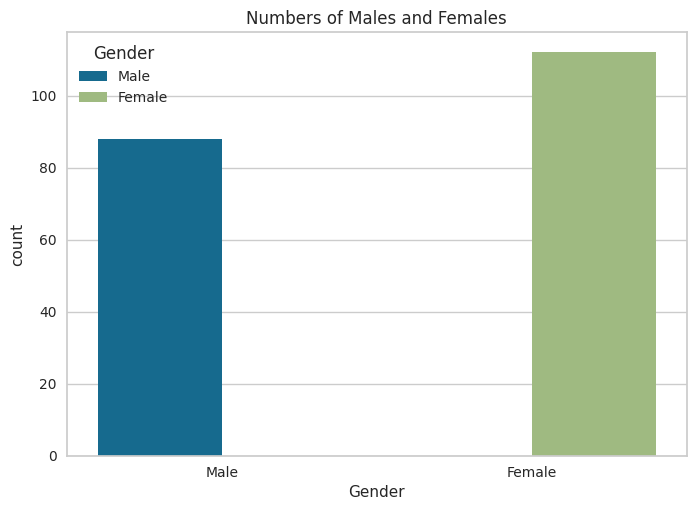

In [15]:
sns.countplot(x = 'Gender', data = df, hue = 'Gender')
plt.title("Numbers of Males and Females");

Interpretation : From above countplot and also from values count function we can say that there are more females than a male in our dataste.

We can also predict in the form of percentages.

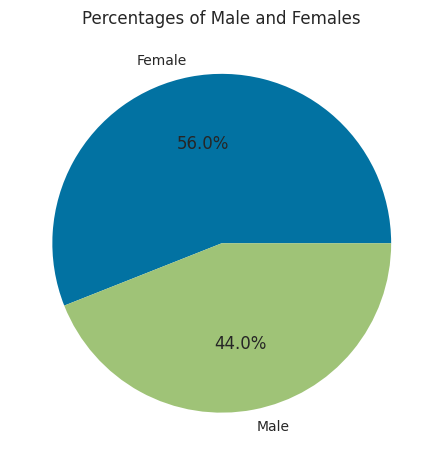

In [16]:
plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct ="%.01f%%")
plt.title('Percentages of Male and Females' );


 Checking the Outliers in the dataset

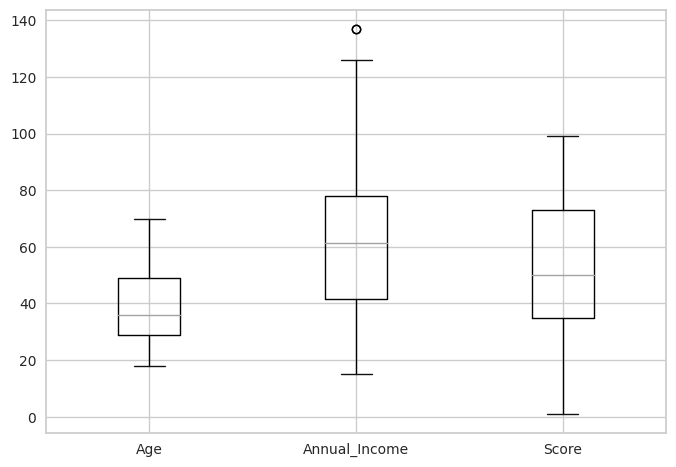

In [17]:
df.iloc[:,1:].boxplot();

We cam see that there is only one outlier present in the data. So no need to remove the outliers from the data.

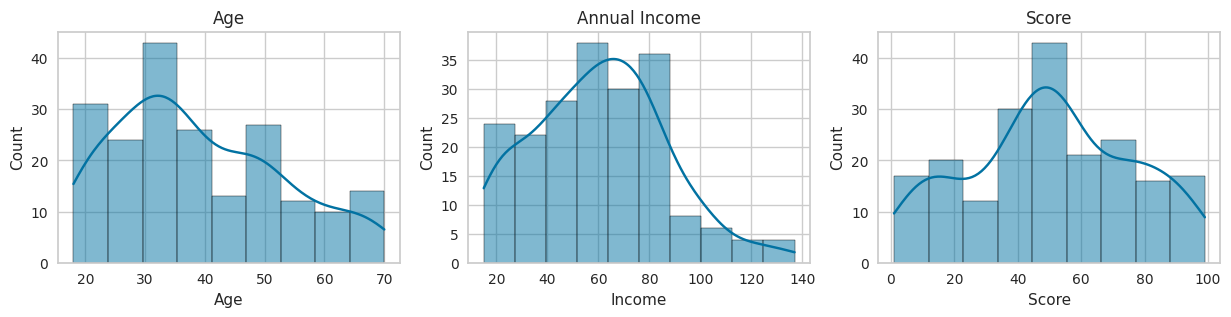

In [18]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)

sns.histplot(df.Age, kde = True)
plt.title("Age")
plt.xlabel("Age");


plt.subplot(1,3,2)
sns.histplot(df.Annual_Income, kde = True)
plt.title("Annual Income")
plt.xlabel("Income");

plt.subplot(1, 3, 3)
sns.histplot(df.Score, kde = True)
plt.title("Score")
plt.xlabel("Score");

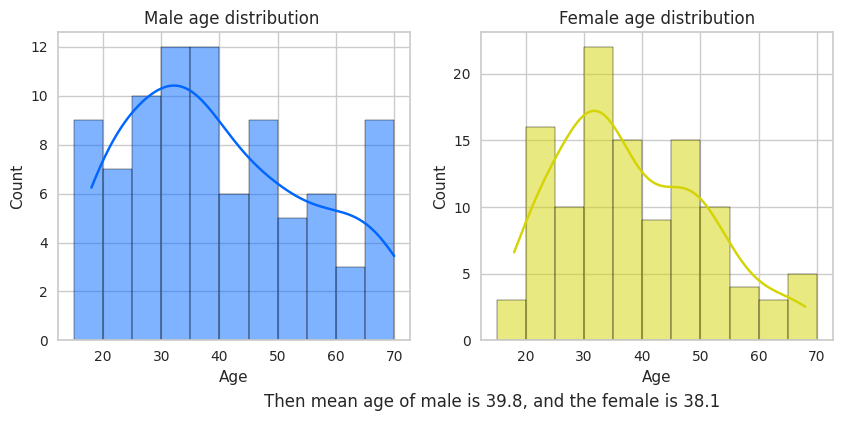

In [19]:
# Distribution of age with respect to gender
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='#0066ff', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");
plt.text(-25,-5,f"Then mean age of male is {round(male.mean(),1)}, and the female is {round(female.mean(),1)}")

plt.show()

The average age of male is little bit higher than the feamale i.e (39.8 and 38.1).<br> Also we can see that the distribution of age in male is uniform than the female.

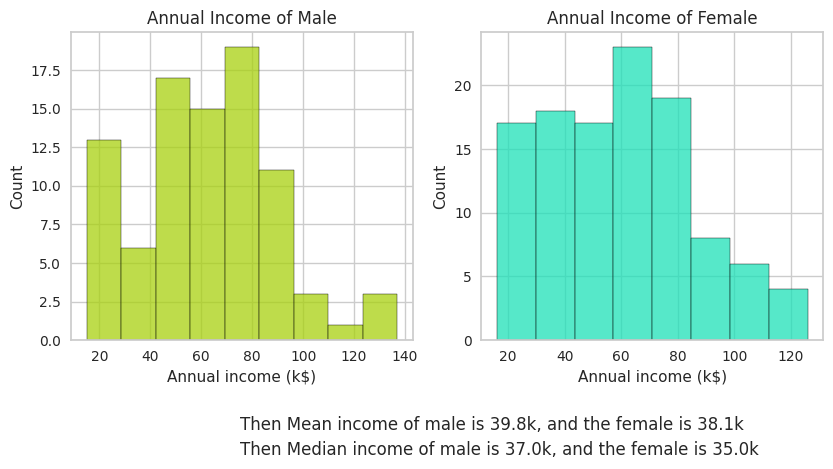

In [20]:
income_male = df[df.Gender == "Male"]["Annual_Income"]
income_female = df[df.Gender != "Male"]["Annual_Income"]

plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.histplot(income_male, color = '#A8D10E')
plt.title("Annual Income of Male")
plt.xlabel("Annual income (k$)")

plt.subplot(1,3,2)
sns.histplot(income_female, color = '#1DE1B8')
plt.title("Annual Income of Female")
plt.xlabel("Annual income (k$)")
plt.text(-75,-7,f"Then Mean income of male is {round(male.mean(),1)}k, and the female is {round(female.mean(),1)}k")
plt.text(-75,-9,f"Then Median income of male is {round(male.median(),1)}k, and the female is {round(female.median(),1)}k")
plt.show()


We can see that the mean and the median of male income is greater than female.

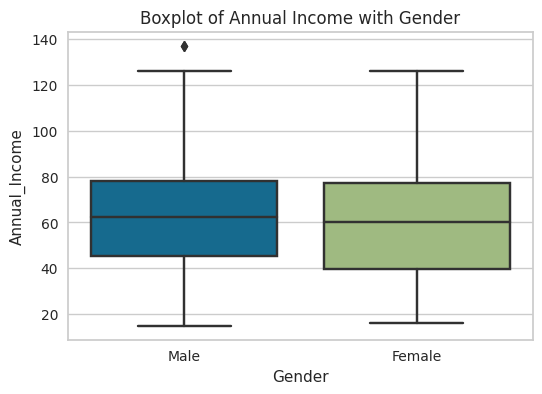

In [21]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Gender', y = "Annual_Income", data = df)
plt.title("Boxplot of Annual Income with Gender")
plt.show()

There are no outliers present in the income with respect to the gender.

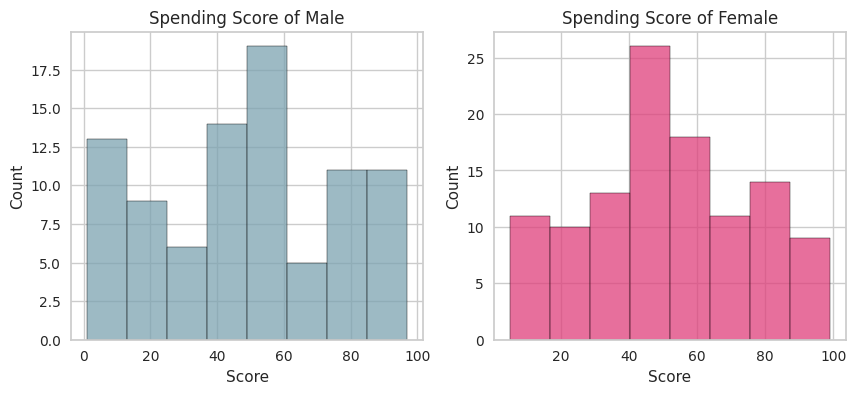

In [22]:
score_male = df[df.Gender == "Male"]["Score"]
score_female = df[df.Gender != "Male"]["Score"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(score_male, color = "#7CA3B1")
plt.title("Spending Score of Male")

plt.subplot(1,2,2)
sns.histplot(score_female, color = '#DF3F7B')
plt.title("Spending Score of Female")
plt.show()

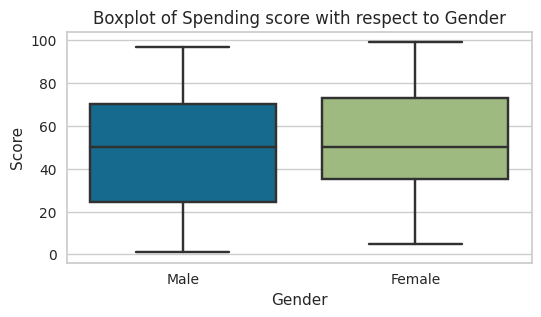

In [23]:
plt.figure(figsize = (6,3))

sns.boxplot(x = df.Gender, y = df.Score)
plt.title('Boxplot of Spending score with respect to Gender')
plt.show()

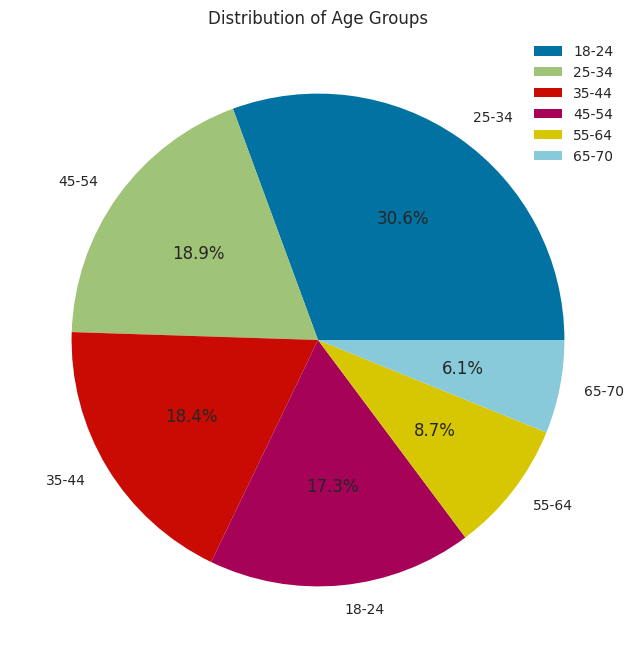

In [24]:
# Spending Score by age group

df['Age_Group'] = pd.cut(df.Age, bins = [18, 25, 35, 45, 55, 65, 70], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

plt.figure(figsize = (8, 8))
plt.pie(df.Age_Group.value_counts(), labels = df.Age_Group.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

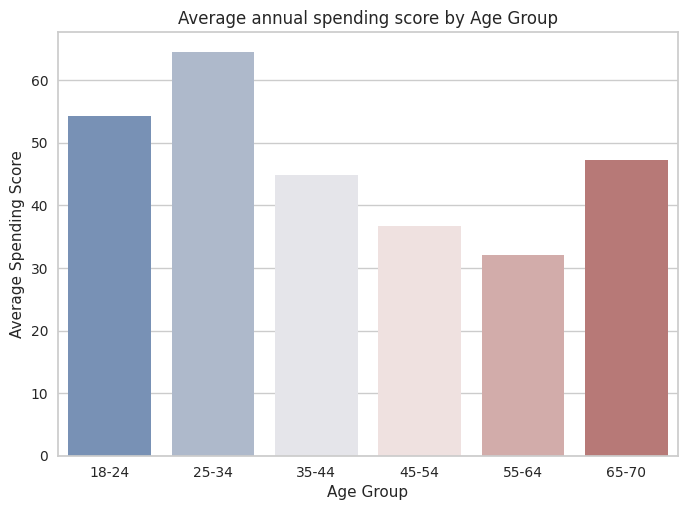

In [25]:
# Calculating the mean spending score of each age group.

mean_score = df.groupby('Age_Group')['Score'].mean()

sns.barplot(x = mean_score.index, y = mean_score.values, palette = 'vlag')
plt.title("Average annual spending score by Age Group")
plt.ylabel("Average Spending Score")
plt.xlabel("Age Group")
plt.show()

In [26]:
df.drop("Age_Group", axis = 1, inplace = True)

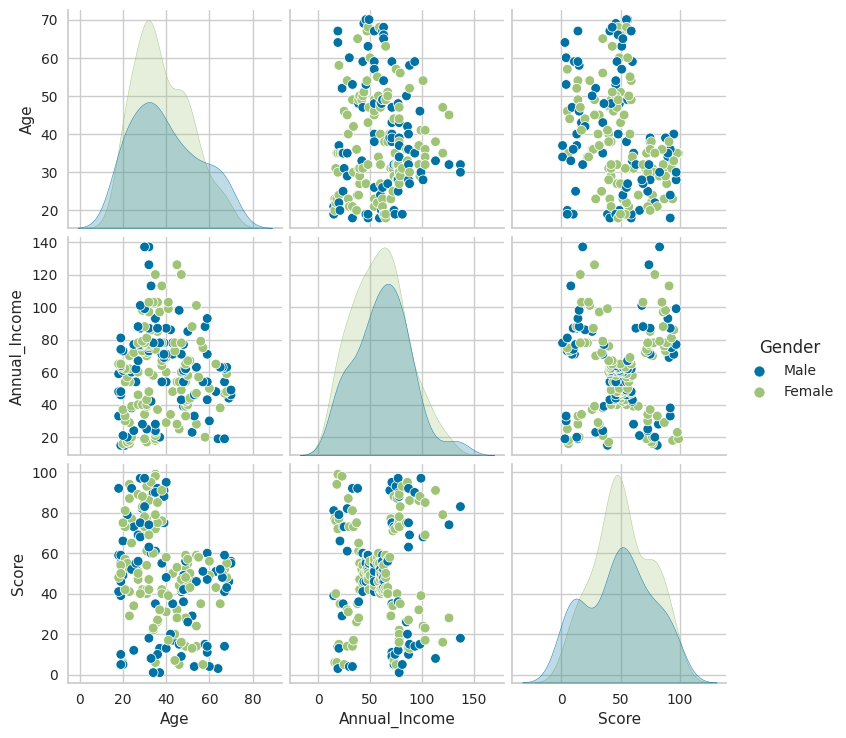

In [27]:
sns.pairplot(df.drop("CustomerID", axis = 1), hue = "Gender");

From above plot we can say that the gender has no direct relation to segmenting customers.<br> So now we can drop it and move on with other features which is why we will use X parameter from now on.

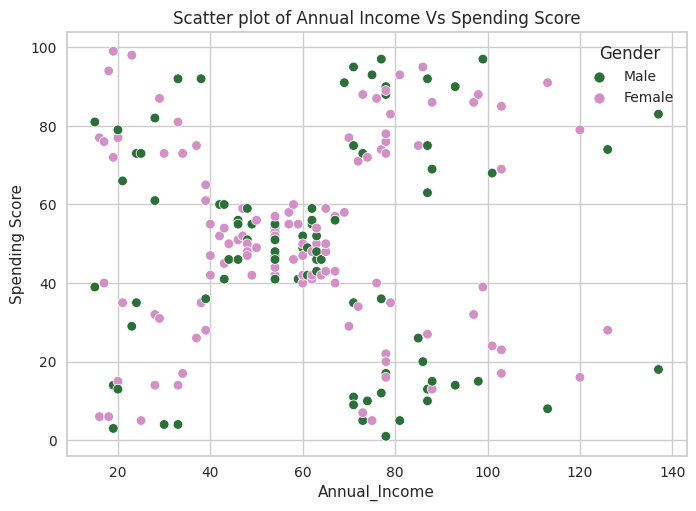

In [28]:
sns.scatterplot(x = df.Annual_Income, y = df.Score, hue = df.Gender, palette = 'cubehelix')
plt.title("Scatter plot of Annual Income Vs Spending Score")
plt.ylabel("Spending Score")
plt.show()

As we can see in above plot that customer segmented into the 5 types of clusters depending on Annual Income and Spending Score (1-100).

From the scatter plot shown above, it's evident that only "Annual Income" and "Spending Score" provide meaningful information for clustering, while the other variables are not useful.

# Now we will perform Data Transforming

In [29]:
X  = df.copy()
# Now we will perform LabelEncoding on the Gender column.
enc = LabelEncoder()
X['Gender'] = enc.fit_transform(X['Gender'])
X.drop("CustomerID", axis = 1, inplace = True)
X.head()

,Gender,Age,Annual_Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


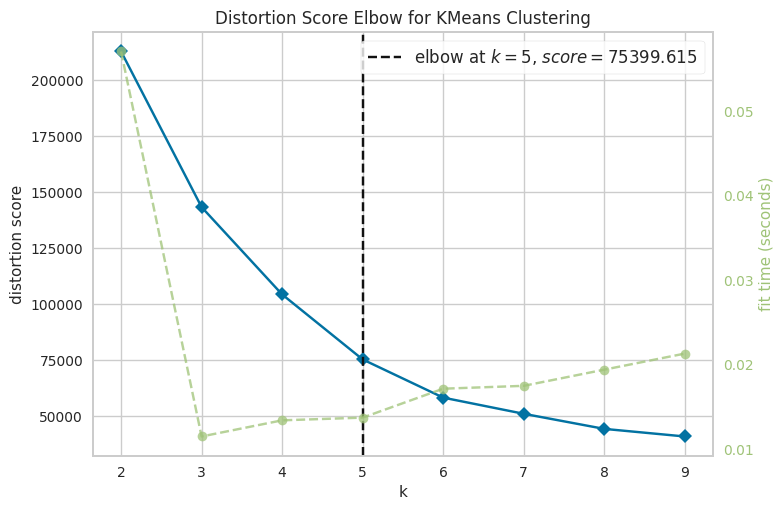

In [30]:

KM_model = KMeans(random_state = 0)
visualise = KElbowVisualizer(KM_model, k = (2, 10))


visualise.fit(X)
visualise.show()
plt.show()

Another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters. Let's see the results.

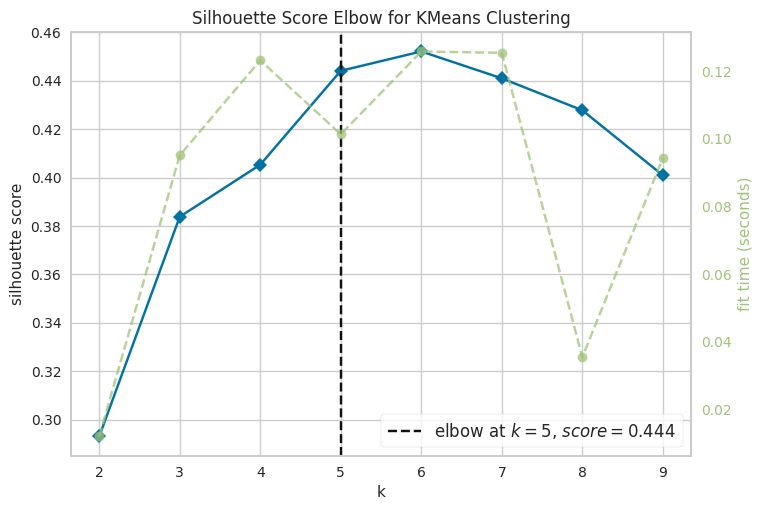

In [31]:

visualise = KElbowVisualizer(KM_model, k = (2, 10), metric = "silhouette")

visualise.fit(X)
visualise.show()
plt.show()

From above we can seee that cluster 5 or 6 we can choolse now we will compare both the clusters one by one and lets see which clustering is the best for our model.

# K-Mean
## Choosing n_clusters = 5

In [32]:
cluster_5 = KMeans(n_clusters = 5, init = 'k-means++')
cluster_5.fit(X)

cluster_label_5 = cluster_5.predict(X)

silh_5 = silhouette_score(X, cluster_label_5)
print("Silhouette Score  of 5 clusters:", silh_5)

KM_5 = df.copy()
KM_5.loc[:,'Cluster'] = cluster_5.labels_

Silhouette Score  of 5 clusters: 0.4440669204743008


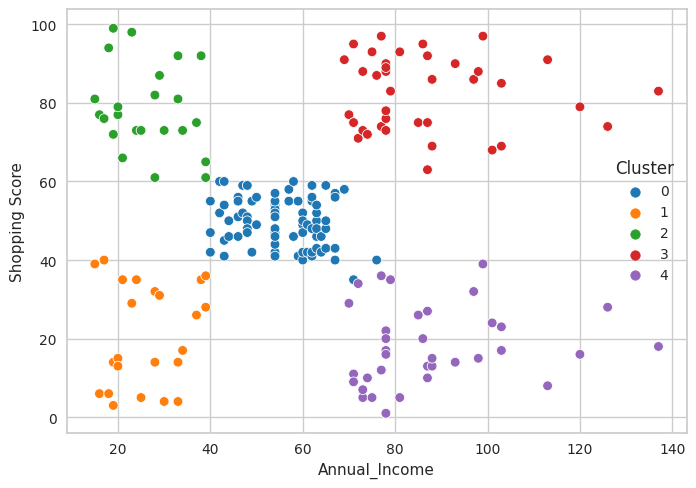

In [33]:
sns.scatterplot(x = "Annual_Income", y = 'Score', data = KM_5, hue = 'Cluster', legend = 'full', palette = 'tab10')
plt.ylabel("Shopping Score")
plt.show()

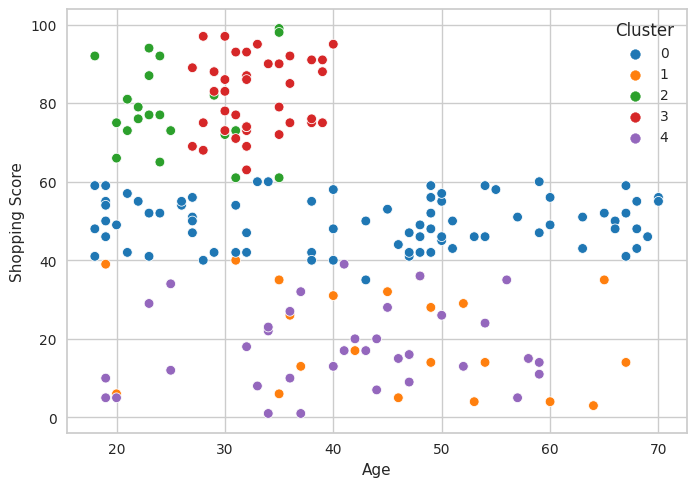

In [34]:
sns.scatterplot(x = "Age", y = "Score", data = KM_5, hue = "Cluster", legend = 'full', palette = "tab10")
plt.ylabel("Shopping Score")
plt.show()

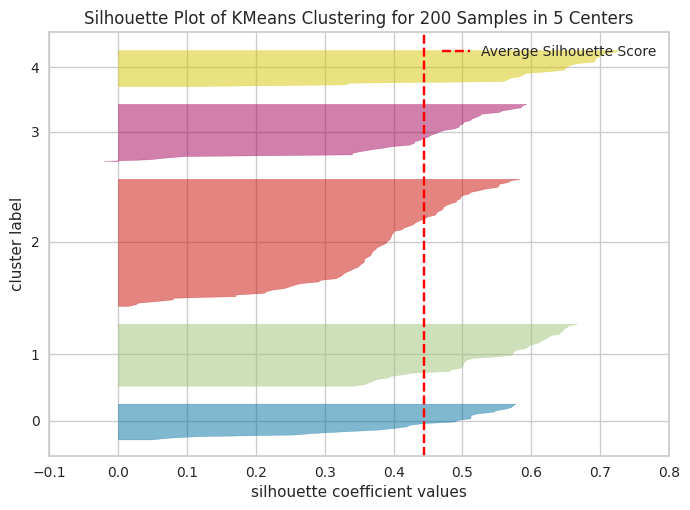

In [35]:

model = KMeans(n_clusters = 5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()
plt.show()

In [36]:
KM_clust_sizes = KM_5.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,79
1,23
2,23
3,39
4,36


As we can see that in cluster 3 there are 79 observation and in rest of them there are in a average 30 observations.<br>
We will furthere see in 3D plots for better understanding using plotely function.

In [37]:
fig = px.scatter_3d(KM_5, x = "Age", y = "Annual_Income", z = "Score", color = 'Cluster', opacity = 0.7 );
fig.show()

## Choosing n_cluster = 6

In [38]:
cluster_6 = KMeans(n_clusters = 6, init = 'k-means++')
cluster_6.fit(X)

cluster_label_6 = cluster_6.predict(X)

silh_6 = silhouette_score(X, cluster_label_6)
print("Silhouette Score  of 6 clusters:", silh_6)

KM_6 = df.copy()
KM_6.loc[:,'Cluster'] = cluster_6.labels_

Silhouette Score  of 6 clusters: 0.45205475380756527


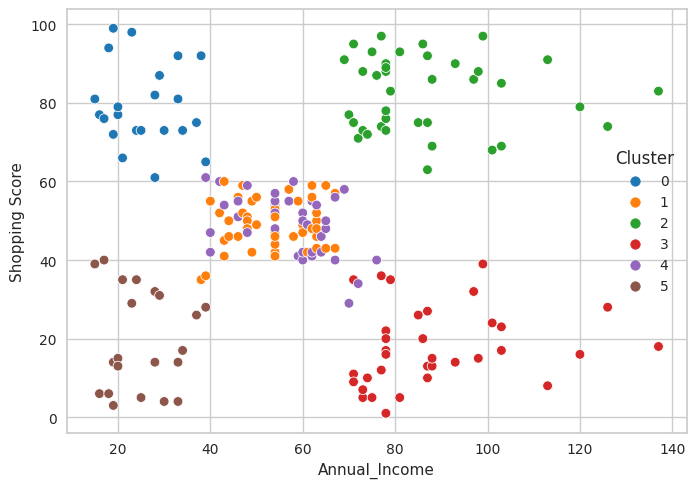

In [39]:
sns.scatterplot(x = "Annual_Income", y = 'Score', data = KM_6, hue = 'Cluster', legend = 'full', palette = 'tab10')
plt.ylabel("Shopping Score")
plt.show()

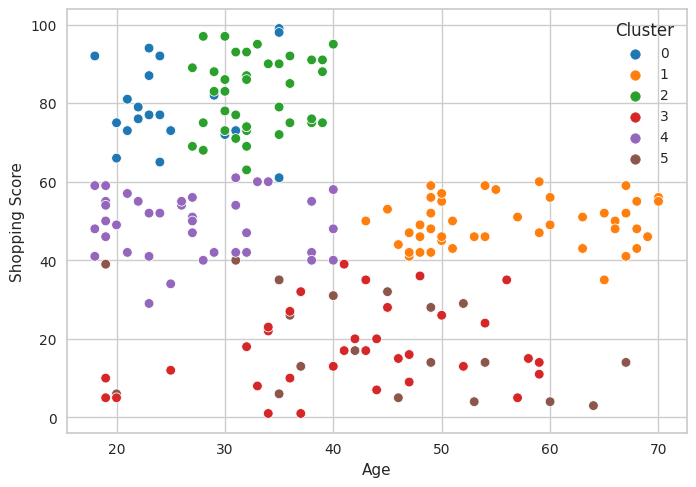

In [40]:
sns.scatterplot(x = "Age", y = "Score", data = KM_6, hue = "Cluster", legend = 'full', palette = "tab10")
plt.ylabel("Shopping Score")
plt.show()

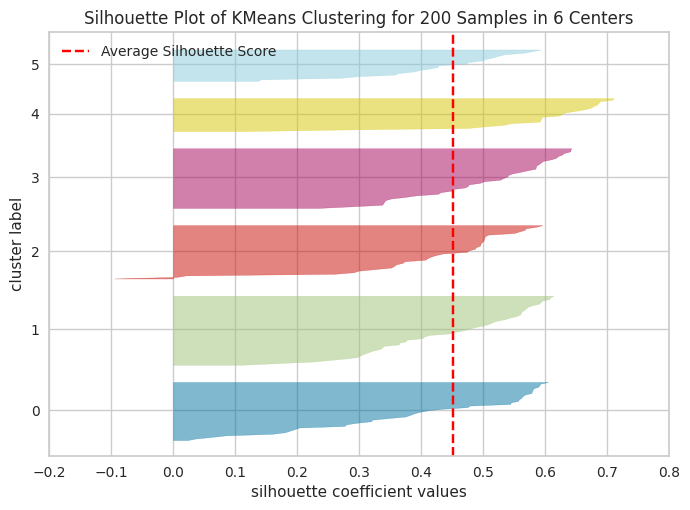

In [41]:

model = KMeans(n_clusters = 6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()
plt.show()

In [42]:
KM_clust = KM_6.groupby('Cluster').size().to_frame()
KM_clust.columns = ["KM_size"]
KM_clust

,KM_size
Cluster,
0,22
1,45
2,39
3,35
4,38
5,21


After using cluster size 6 we get the perfect balanced observation in our dataset.

In [43]:
fig = px.scatter_3d(KM_6, x = "Age", y = "Annual_Income", z = "Score", color = 'Cluster', opacity = 0.8)
fig.show()

# Gaussian Mixture

### With 5 Clusters:

In [44]:
gm = GaussianMixture(n_components = 5,n_init = 10,max_iter = 100)

In [45]:
gm.fit(X)
label_gm5 = gm.predict(X)

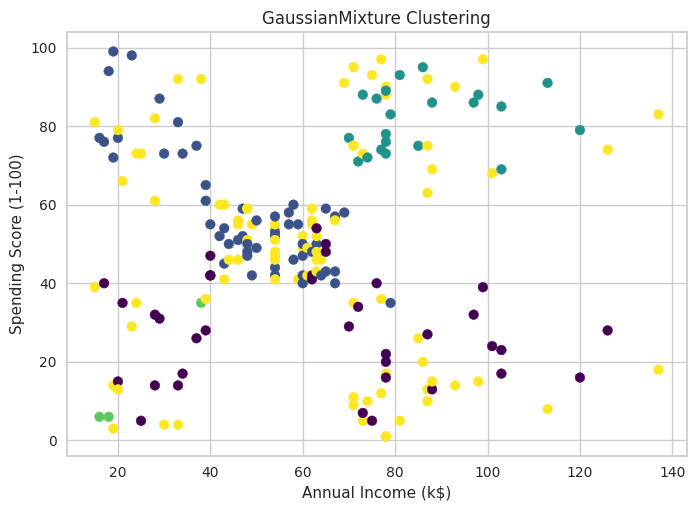

In [46]:
plt.scatter(X.iloc[:,-2], X.iloc[:,-1], c=label_gm5, cmap='viridis')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('GaussianMixture Clustering')
plt.show()

In [47]:
silhouette_5 = silhouette_score(X, label_gm5)
print("Silhouette Score  of 5 clusters:", silhouette_5)

Silhouette Score  of 5 clusters: -0.03355099509587786


### With 6 Clusters:

In [48]:
gm = GaussianMixture(n_components = 6,n_init = 10,max_iter = 100)

In [49]:
gm.fit(X)
label_gm6 = gm.predict(X)

In [50]:
silhouette_6 = silhouette_score(X, label_gm6)
print("Silhouette Score  of 6 clusters:", silhouette_6)

Silhouette Score  of 6 clusters: -0.017876742494280708


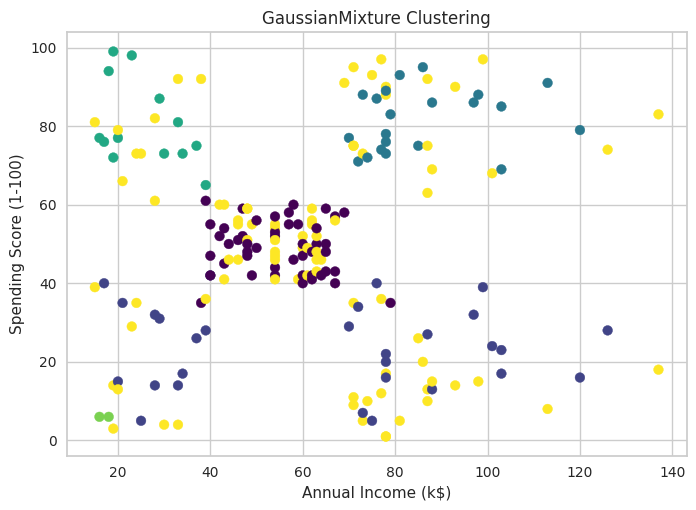

In [51]:
plt.scatter(X.iloc[:,-2], X.iloc[:,-1], c=label_gm6, cmap='viridis')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('GaussianMixture Clustering')
plt.show()

### KMean Clustering
    - Silhouette Score  of 5 clusters: 0.4440669204743008<br>
    - Silhouette Score  of 6 clusters: 0.45205475380756527<br>

### Gaussian Mixture Clustering
    - Silhouette Score  of 5 clusters: 0.4162031207414105<br>
    - lhouette Score  of 6 clusters: 0.021016659372280356


From the Silhouette Score we can say that we a=re getting better result using KMean with 6 clusters.
As we kmow that Silhouette measures how similar a data point is within-cluster compared to other clusters. A higher Silhouette score indicates better cluster seperation.